# Text Classification with Bag of Words - Natural Language Processing

![](https://i.imgur.com/hlEQ5X8.png)

> _"Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data."_ - Wikipedia

> _**Bag of Words**: The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears._
 
Outline:

1. Download and explore a real-world dataset
2. Apply text preprocessing techniques
3. Implement the bag of words model
4. Train ML models for text classification
5. Make predictions and submit to Kaggle


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification



## Download and Explore the Data

Outline:

1. Download the dataset from Kaggle to Colab
2. Explore the data using Pandas
3. Create a small working sample

### Download the Data to Colab

Upload your `kaggle.json` to Colab. Get it here: https://www.kaggle.com/docs/api#authentication



In [14]:
!pip install kaggle

     |████████████████████████████████| 83 kB 4.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 11.7 MB/s            
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=a256fc85e0ba784235da2a229c3d74728bfbac1c73ccff8ca28485efae5732cc
  Stored in directory: /home/jovyan/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle


In [3]:
!ls -a

.   .git		.jovianrc    quora-text-classification-live.ipynb
..  .ipynb_checkpoints	kaggle.json


In [4]:
import os

In [17]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [18]:
IS_KAGGLE

False

In [19]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sample_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sample_fname = 'data/sample_submission.csv.zip' 

 98%|█████████████████████████████████████▎| 54.0M/54.9M [00:05<00:00, 12.4MB/s]
100%|██████████████████████████████████████| 54.9M/54.9M [00:05<00:00, 10.9MB/s]
100%|██████████████████████████████████████| 15.8M/15.8M [00:02<00:00, 14.3MB/s]
100%|██████████████████████████████████████| 15.8M/15.8M [00:02<00:00, 6.37MB/s]
 73%|███████████████████████████▉          | 3.00M/4.09M [00:01<00:00, 2.32MB/s]
100%|██████████████████████████████████████| 4.09M/4.09M [00:01<00:00, 2.26MB/s]


### Explore the Data using Pandas

In [20]:
import pandas as pd

In [21]:
raw_df = pd.read_csv(train_fname)

In [22]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


<AxesSubplot:>

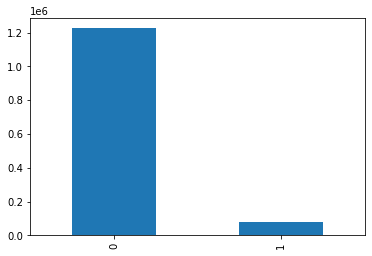

In [29]:
raw_df.target.value_counts().plot(kind='bar')

In [28]:
raw_df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

<AxesSubplot:>

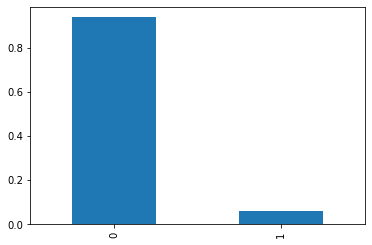

In [27]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [30]:
sincere_df = raw_df[raw_df.target == 0]

In [31]:
insincere_df = raw_df[raw_df.target == 1]

In [32]:
test_df = pd.read_csv(test_fname)

In [33]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [34]:
sub_df = pd.read_csv(sample_fname)

In [35]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [36]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

### Create a Working Sample


In [37]:
if IS_KAGGLE:
    SAMPLE_SIZE = len(raw_df)
else:
    SAMPLE_SIZE = 100_000

In [38]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)

In [39]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [40]:
q0 = sincere_df.question_text.values[1]

In [41]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [42]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]

In [43]:
q1

'Has the United States become the largest dictatorship in the world?'

### Tokenization

splitting a document into words and separators

In [46]:
!pip install nltk -q

In [47]:
import nltk

In [48]:
from nltk.tokenize import word_tokenize

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [51]:
word_tokenize(' this is (something) with, a lot of, punctuation;')

['this',
 'is',
 '(',
 'something',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [52]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [53]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

### Stop Word Removal

Removing commonly occuring words

In [54]:
from nltk.corpus import stopwords

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
english_stopwords = stopwords.words('english')

In [58]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [59]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [60]:
q0_stp = remove_stopwords(q0_tok)

In [62]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [63]:
q1_stp = remove_stopwords(q1_tok)

In [64]:
q1_stp 

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### Stemming

"go", "gone", "going" -> "go"
"birds", "bird" -> "bird"

In [65]:
from nltk.stem.snowball import SnowballStemmer

In [66]:
stemmer = SnowballStemmer(language='english')

In [67]:
stemmer.stem('going')

'go'

In [68]:
stemmer.stem('supposedly')

'suppos'

In [69]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [70]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [71]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [72]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization

"love" -> "love"
"loving" -> "love"
"lovable" -> "love"


## Implement Bag of Words 


Outline:

1. Create a vocabulary using Count Vectorizer
2. Transform text to vectors using Count Vectorizer
3. Configure text preprocessing in Count Vectorizer

### Create a Vocabulary

In [73]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [74]:
small_df = sample_df.head()

In [75]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [76]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
small_vect = CountVectorizer()

In [79]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [80]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform documents into Vectors

In [81]:
vectors = small_vect.transform(small_df.question_text)

In [82]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [83]:
vectors.shape

(5, 51)

In [84]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

### Configure Count Vectorizer Parameters

In [85]:
stemmer = SnowballStemmer(language='english')

In [86]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [87]:
tokenize('What is the really (dealing) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [88]:
vectorizer = CountVectorizer(lowercase=True, 
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [89]:
%%time
vectorizer.fit(sample_df.question_text)

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 24.5 s, sys: 53.5 ms, total: 24.6 s
Wall time: 25.2 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f5762f5ed30>)

In [90]:
len(vectorizer.vocabulary_)

1000

In [91]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [92]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 25 s, sys: 6.92 ms, total: 25 s
Wall time: 25.7 s


In [93]:
inputs.shape

(100000, 1000)

In [95]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [96]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 32s, sys: 63.6 ms, total: 1min 32s
Wall time: 1min 32s


## ML Models for Text Classification

Outline:

- Create a training & validation set
- Train a logistic regression model
- Make predictions on training, validation & test data

### Split into Training and Validation Set

In [97]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [98]:
inputs.shape

(100000, 1000)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, 
                                                                        test_size=0.3, random_state=42)

### Train Logistic Regression model

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
MAX_ITER = 1000

In [105]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')

In [106]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 12.6 s, sys: 7.8 ms, total: 12.6 s
Wall time: 12.7 s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions using the model

In [107]:
train_preds = model.predict(train_inputs)

In [108]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(train_targets, train_preds)

0.9504428571428571

In [111]:
import numpy as np

In [112]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [113]:
from sklearn.metrics import f1_score

In [114]:
f1_score(train_targets, train_preds)

0.4457581083240134

In [115]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [116]:
random_preds = np.random.choice((0, 1), len(train_targets))
f1_score(train_targets, random_preds)

0.10694426812238161

In [117]:
val_preds = model.predict(val_inputs)

In [118]:
f1_score(val_targets, val_preds)

0.40843507214206437

In [119]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [120]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [121]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Make Predictions and Submit to Kaggle

In [122]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [123]:
test_preds = model.predict(test_inputs)

In [124]:
sub_df.prediction = test_preds

In [125]:
sub_df.to_csv('submission.csv', index=None)

In [127]:
sub_df.prediction.value_counts()

0    364964
1     10842
Name: prediction, dtype: int64